<a href="https://colab.research.google.com/github/ArshjotSingh7/Thapar-Summer-School-Assignments/blob/main/Assignment_R_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.Create a file that contains 1000 lines of random strings.

In [ ]:
library(stringi)

In [ ]:
string=stri_rand_strings(1000,runif(1,min=2,max=6),'[A-Z]')
head(string)

[1] "BLPR" "KFYI" "UYIB" "UQZJ" "VRJG" "STEH"

In [ ]:
getwd()

[1] "/content"

In [ ]:
write.csv(string,file="Random_Strings.csv",row.names=FALSE)

Q2.Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform
the following operations:

1.Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.

2.Replace all the NA values with the average of the column value.

3.Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.

4.Normalize all the values in the dataset between 0 and 10.

5.Replace all the values in the dataset with 1 if value <=0.5 else with 0.

In [ ]:
mat<-matrix(runif(100*30,min=1,max=200),ncol=30)
data=data.frame(mat)
names(data)
head(data)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18" "X19" "X20" "X21" "X22" "X23" "X24"
[25] "X25" "X26" "X27" "X28" "X29" "X30"

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.672096,176.44731,108.182453,161.23709,190.89459,69.519711,162.25370,163.6662,137.138008,30.51617,⋯,159.1490,118.90752,128.21187,13.80421,91.969917,74.27091,186.87575,68.76509,95.98563,158.645020
2,56.713488,43.29850,31.081608,108.15527,160.49506,40.705093,30.31452,76.5900,196.915377,32.17136,⋯,145.1220,24.27658,173.84016,174.60051,95.300393,184.48466,44.58301,129.00342,40.77798,159.563877
3,180.613665,64.95426,3.986222,119.26274,29.96638,95.166715,14.74387,34.0552,93.724773,90.84356,⋯,170.5859,25.48703,15.71054,188.17922,96.617843,196.91523,24.78217,116.54622,30.45167,71.472724
4,25.269634,21.09119,43.460442,166.82229,103.26833,6.076748,182.58597,188.9027,101.280810,97.65134,⋯,127.7351,53.55043,44.33896,93.59844,1.154264,102.91584,25.36792,123.58526,104.62652,4.223999
5,62.610465,189.92649,109.546680,184.86233,40.20285,173.593235,48.02927,154.9683,9.784906,136.77584,⋯,46.1833,36.64455,135.75446,49.32631,138.915971,112.84432,161.75053,55.56747,20.18563,84.840442
6,108.485367,45.07267,70.047089,57.77001,73.30720,122.283719,142.88038,111.9664,134.784801,158.29800,⋯,175.9271,116.66105,63.82696,184.50188,193.872060,66.13021,111.99793,167.91044,154.30914,64.181414


In [ ]:
data[data>10 & data<60]<-NA
head(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.672096,176.44731,108.182453,161.2371,190.8946,69.519711,162.2537,163.6662,137.138008,NA,⋯,159.1490,118.9075,128.21187,NA,91.969917,74.27091,186.8757,68.76509,95.98563,158.645020
2,NA,NA,NA,108.1553,160.4951,NA,NA,76.5900,196.915377,NA,⋯,145.1220,NA,173.84016,174.60051,95.300393,184.48466,NA,129.00342,NA,159.563877
3,180.613665,64.95426,3.986222,119.2627,NA,95.166715,NA,NA,93.724773,90.84356,⋯,170.5859,NA,NA,188.17922,96.617843,196.91523,NA,116.54622,NA,71.472724
4,NA,NA,NA,166.8223,103.2683,6.076748,182.5860,188.9027,101.280810,97.65134,⋯,127.7351,NA,NA,93.59844,1.154264,102.91584,NA,123.58526,104.62652,4.223999
5,62.610465,189.92649,109.546680,184.8623,NA,173.593235,NA,154.9683,9.784906,136.77584,⋯,NA,NA,135.75446,NA,138.915971,112.84432,161.7505,NA,NA,84.840442
6,108.485367,NA,70.047089,NA,73.3072,122.283719,142.8804,111.9664,134.784801,158.29800,⋯,175.9271,116.6611,63.82696,184.50188,193.872060,66.13021,111.9979,167.91044,154.30914,64.181414


In [ ]:
sum(is.na(data))

[1] 765

In [ ]:
mean_val<-colMeans(data,na.rm=TRUE)
for(i in colnames(data))
  data[,i][is.na(data[,i])]<-mean_val
head(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.672096,176.44731,108.182453,161.2371,190.8946,69.519711,162.2537,163.6662,137.138008,121.17199,⋯,159.1490,118.9075,128.21187,121.17199,91.969917,74.27091,186.8757,68.76509,95.98563,158.645020
2,121.171990,121.17199,121.171990,108.1553,160.4951,121.171990,121.1720,76.5900,196.915377,113.52925,⋯,145.1220,121.1720,173.84016,174.60051,95.300393,184.48466,121.1720,129.00342,121.17199,159.563877
3,180.613665,64.95426,3.986222,119.2627,121.1720,95.166715,113.5292,121.1720,93.724773,90.84356,⋯,170.5859,113.5292,121.17199,188.17922,96.617843,196.91523,113.5292,116.54622,113.52925,71.472724
4,113.529246,113.52925,113.529246,166.8223,103.2683,6.076748,182.5860,188.9027,101.280810,97.65134,⋯,127.7351,123.8536,113.52925,93.59844,1.154264,102.91584,123.8536,123.58526,104.62652,4.223999
5,62.610465,189.92649,109.546680,184.8623,113.5292,173.593235,123.8536,154.9683,9.784906,136.77584,⋯,121.1720,132.4895,135.75446,113.52925,138.915971,112.84432,161.7505,121.17199,123.85362,84.840442
6,108.485367,123.85362,70.047089,121.1720,73.3072,122.283719,142.8804,111.9664,134.784801,158.29800,⋯,175.9271,116.6611,63.82696,184.50188,193.872060,66.13021,111.9979,167.91044,154.30914,64.181414


In [ ]:
corr=cor(data)
head(corr)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
X1,1.00000000,-0.171075195,0.041257800,-0.108408333,-0.01005934,-0.061366779,-0.14994034,-0.187383832,-0.03481885,-0.05855476,⋯,0.11003987,-0.03189285,-0.192274863,-0.12397054,0.015058055,-0.085167787,-0.114159832,0.12302984,-0.06131100,-0.13663929
X2,-0.17107520,1.000000000,-0.002338566,-0.078021124,-0.04635534,-0.022039832,0.11959862,0.061141237,-0.05496314,-0.09016257,⋯,-0.10157284,0.06223963,-0.022032592,-0.02504127,0.065448045,-0.058207826,0.056800987,-0.11144092,0.01398771,-0.01983697
X3,0.04125780,-0.002338566,1.000000000,-0.018592179,0.03645892,-0.132825950,-0.04305537,-0.176821658,0.07751978,0.04207457,⋯,0.02351057,0.02151408,0.008751411,-0.03766286,-0.100988180,0.074778191,-0.102184069,0.13645875,0.16655945,0.03715766
X4,-0.10840833,-0.078021124,-0.018592179,1.000000000,-0.04730265,0.003385838,0.24124589,0.107518633,0.09502540,-0.01927562,⋯,-0.07726140,-0.18346341,-0.029897690,0.19191235,0.003516707,0.079149392,0.006207561,-0.05243213,0.02870193,-0.02768712
X5,-0.01005934,-0.046355338,0.036458916,-0.047302649,1.00000000,0.072118719,-0.04438581,-0.120814243,0.15286433,-0.19675335,⋯,0.13926650,0.06811365,-0.088163673,-0.06418472,-0.013341276,0.021125168,0.001939048,-0.11156395,-0.04355031,0.09076655
X6,-0.06136678,-0.022039832,-0.132825950,0.003385838,0.07211872,1.000000000,0.09361822,-0.008523146,0.14202053,-0.16230354,⋯,-0.03210320,0.12125684,0.081401349,-0.11087514,0.181219819,0.002884661,-0.118937685,0.08898895,-0.16339018,0.16695415


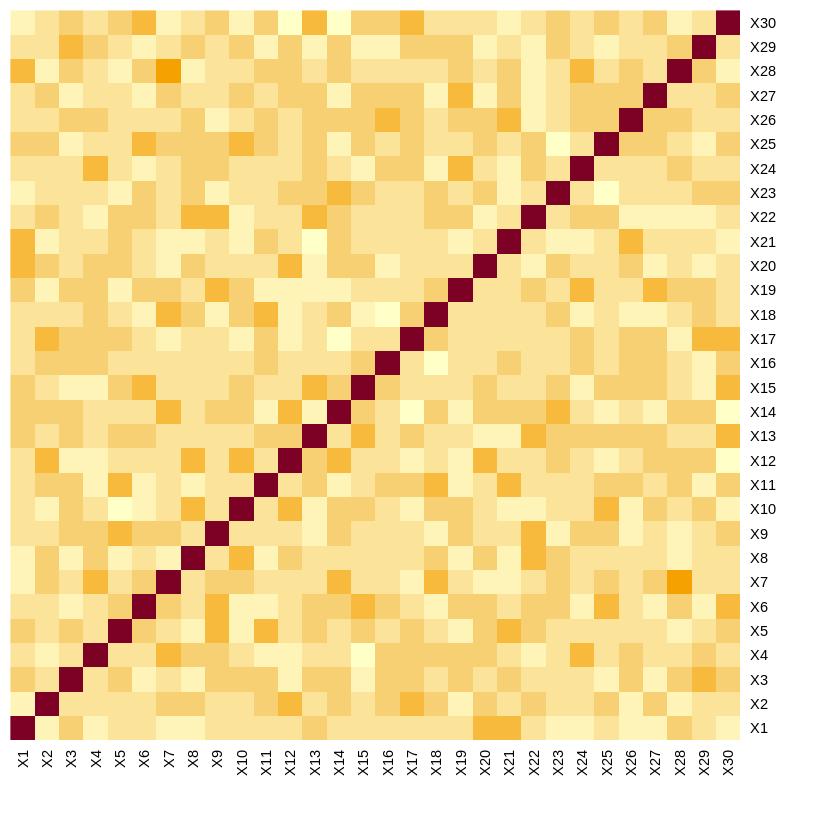

In [ ]:
heatmap(corr,Colv=NA,Rowv=NA,scale="column")   # Colv=NA and Rowv=NA to remove dendograms

In [ ]:
names(data[,1:10])     # data[,1:10] means that see all rows till that particular column ie 1 to 10

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10"

In [ ]:
data<-as.data.frame(scale(data)) #normalize the data
head(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-2.776983135,1.24898147,-0.40914772,0.6673385,1.88201560,-1.46965032,0.98991819,1.09310658,0.2274143,0.002464351,⋯,0.89524790,0.07853028,0.06459937,0.04288677,-0.7279960,-0.82257680,1.60153077,-1.13531177,-0.53418681,0.8686322
2,-0.005287569,0.11211819,-0.05096567,-0.4873078,1.03615198,-0.03973516,-0.05398423,-1.10326188,1.7222558,-0.160410329,⋯,0.56883407,0.12926817,1.22342612,1.29391357,-0.6476562,1.39071858,0.11646903,0.25879547,0.07342427,0.8875240
3,1.472330239,-1.04412784,-3.28232339,-0.2456957,-0.05800826,-0.75965183,-0.24818936,0.02125257,-0.8582124,-0.643865561,⋯,1.16139076,-0.04197566,-0.11419314,1.61185859,-0.6158758,1.64034725,-0.05627523,-0.02950389,-0.11095394,-0.9236328
4,-0.195273032,-0.04507231,-0.26171173,0.7888291,-0.55617570,-3.22597272,1.50656919,1.72965831,-0.6692600,-0.498784733,⋯,0.16423559,0.18935293,-0.30829673,-0.60274683,-2.9187079,-0.24733381,0.17708024,0.13340202,-0.32572862,-2.3062686
5,-1.461026347,1.52621172,-0.37152965,1.1812395,-0.27066679,1.41146769,0.01415702,0.87371351,-2.9572810,0.334998281,⋯,0.01150823,0.38284950,0.25615945,-0.13606780,0.4044661,-0.04795163,1.03364080,0.07755117,0.13811752,-0.6487921
6,-0.320655193,0.16727202,-1.46071745,-0.2041654,-1.38984088,-0.00895860,0.49763440,-0.21094555,0.1685681,0.793657558,⋯,1.28568266,0.02819584,-1.57059120,1.52575378,1.7301512,-0.98605707,-0.09088668,1.15922818,0.87284497,-1.0735423


In [ ]:
data[data<=0.5]<-0
data[data>0.5]<-1
head(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,1,1,0,1,1,0,0,⋯,1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,1,0,⋯,1,0,1,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,⋯,1,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,⋯,1,0,0,1,1,0,0,1,1,0


Q3.Create a random dataset of 500 rows and 10 columns.

Columns 1 to 4 are defined between [-10, 10];

Columns 5 to 8 are defined between [10, 20];

Columns 9 to 10 are defined between [-100, 100].

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.

K-Mean clustering

Hierarchical clustering

In [ ]:
m1<-matrix(runif(500*4,min=-10,max=10),ncol=4)
m2<-matrix(runif(500*4,min=10,max=20),ncol=4)
m3<-matrix(runif(500*2,min=-100,max=100),ncol=2)
data_mat=data.frame(m1,m2,m3)
names(data_mat)
head(mat)

[1] "X1"   "X2"   "X3"   "X4"   "X1.1" "X2.1" "X3.1" "X4.1" "X1.2" "X2.2"

9.672096,176.44731,108.182453,161.23709,190.89459,69.519711,162.25370,163.6662,137.138008,30.51617,⋯,159.1490,118.90752,128.21187,13.80421,91.969917,74.27091,186.87575,68.76509,95.98563,158.645020
56.713488,43.29850,31.081608,108.15527,160.49506,40.705093,30.31452,76.5900,196.915377,32.17136,⋯,145.1220,24.27658,173.84016,174.60051,95.300393,184.48466,44.58301,129.00342,40.77798,159.563877
180.613665,64.95426,3.986222,119.26274,29.96638,95.166715,14.74387,34.0552,93.724773,90.84356,⋯,170.5859,25.48703,15.71054,188.17922,96.617843,196.91523,24.78217,116.54622,30.45167,71.472724
25.269634,21.09119,43.460442,166.82229,103.26833,6.076748,182.58597,188.9027,101.280810,97.65134,⋯,127.7351,53.55043,44.33896,93.59844,1.154264,102.91584,25.36792,123.58526,104.62652,4.223999
62.610465,189.92649,109.546680,184.86233,40.20285,173.593235,48.02927,154.9683,9.784906,136.77584,⋯,46.1833,36.64455,135.75446,49.32631,138.915971,112.84432,161.75053,55.56747,20.18563,84.840442
108.485367,45.07267,70.047089,57.77001,73.30720,122.283719,142.88038,111.9664,134.784801,158.29800,⋯,175.9271,116.66105,63.82696,184.50188,193.872060,66.13021,111.99793,167.91044,154.30914,64.181414


In [ ]:
install.packages("factoextra")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(factoextra)
library(cluster)
library(ggpubr)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
kmeans_clustering <- kmeans(scale(data_mat), 3, nstart = 10)

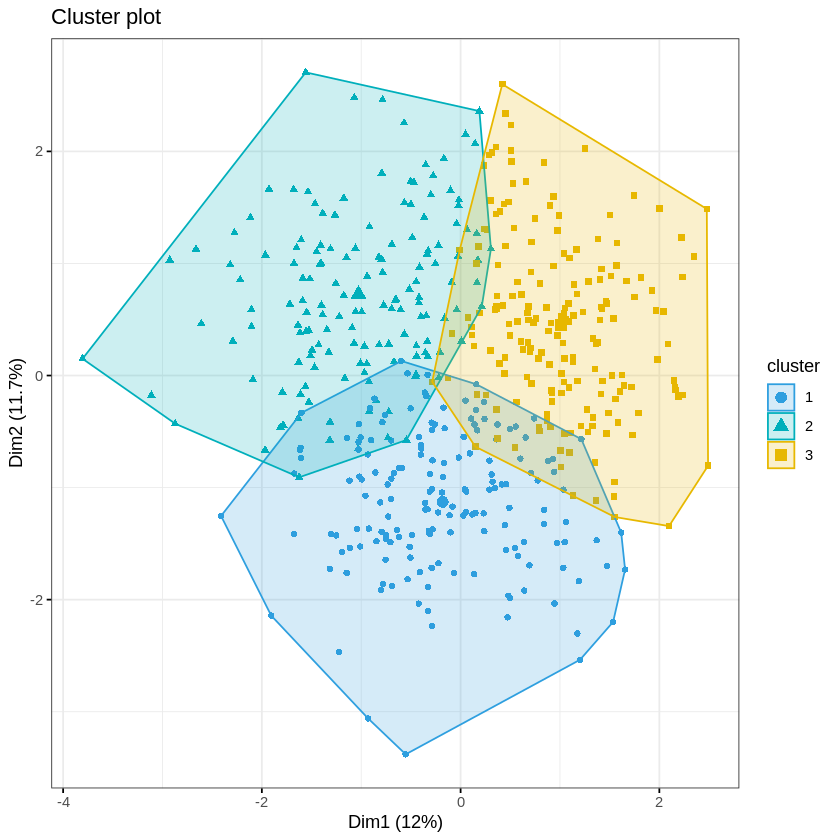

In [ ]:
fviz_cluster(kmeans_clustering, data = data_mat,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800"),
             geom = "point",
             ellipse.type = "convex",
             ggtheme = theme_bw()
             )

In [ ]:
data_mat

X1,X2,X3,X4,X1.1,X2.1,X3.1,X4.1,X1.2,X2.2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-6.3993608,-4.2939621,-5.2837093,-6.9073765,11.93799,15.97759,11.26559,18.87825,-21.5870862,56.610805
-2.1493567,-9.0304997,-3.4113848,2.3645048,17.42301,12.14936,12.47777,13.19769,22.4505306,91.543250
9.9898908,9.3967284,0.6810129,4.0975269,16.62831,11.10297,17.17729,12.05459,92.2903526,92.385856
-3.2561892,0.5663872,-5.3511426,-8.7910644,13.81708,14.36775,13.06063,10.95913,76.2793372,35.563520
4.1947220,5.9836477,-1.6569018,-9.0576958,11.96318,17.13414,16.97380,18.38006,72.7292820,-61.103535
9.7653404,1.4473540,-5.8098548,-0.6142280,16.95654,18.49636,12.47601,10.26426,81.2407212,-9.958129
-6.8942356,-4.4537526,2.4662272,5.3559053,17.32682,12.66590,11.43517,17.49600,7.4551340,89.595562
-0.7348595,-9.8350900,8.3396244,-3.2614605,12.21124,17.69658,16.03782,12.85589,-64.5090224,43.169200
-5.9310003,0.8442955,3.4126818,5.4491052,14.99041,18.86625,14.10750,11.38832,-3.1498618,15.691619


In [ ]:
sum(is.na(data_mat))

[1] 0

In [ ]:
hier_clustering <- agnes(data_mat, method = "ward")

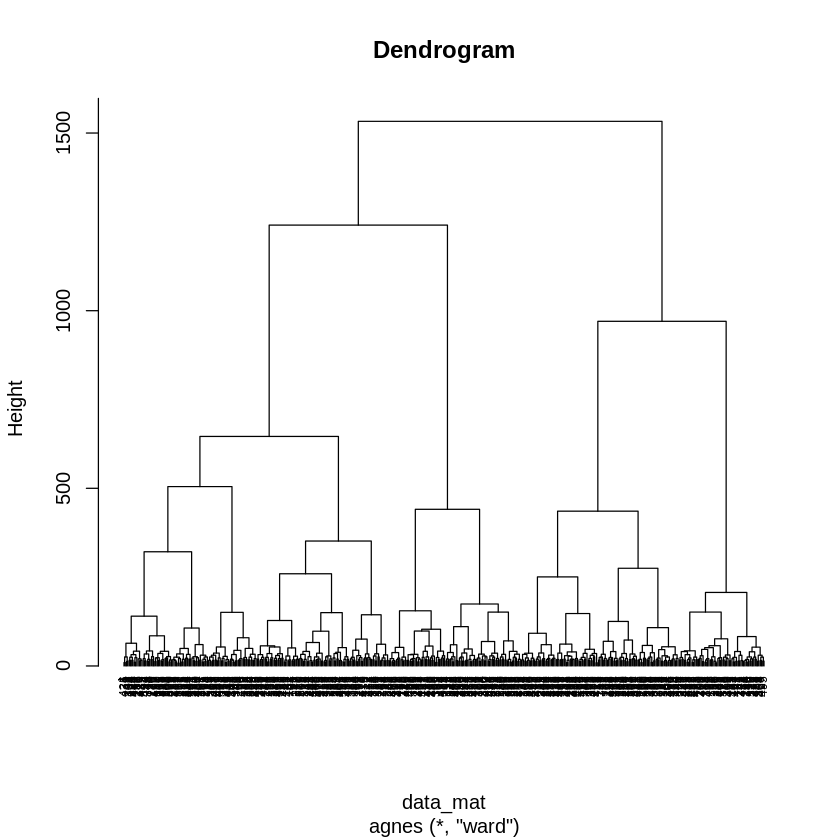

In [ ]:
pltree(hier_clustering, cex = 0.6, hang = -1, main = "Dendrogram")

Q4. Create a random dataset of 600 rows and 15 columns.
All the values are defined between [-100,100].

Perform the following operations:

1.Plot Scatter Plot between Column 5 and Column

2.Plot Histogram of each column in single graph.

3.Plot the Box plot of each column in single graph.

In [ ]:
NCols = 15
NRows = 600
mat4 <- matrix(runif(NCols * NRows, min=-100, max=100), ncol=NCols)

In [ ]:
head(mat4)

-30.90678,-32.04296,54.462071,-89.889691,5.207347,-19.25824,-2.13641,86.073273,75.46530,-86.679175,-3.625111,-24.270226,-61.95774,27.981986,65.706663
23.79943,60.87108,-91.548698,68.284177,-51.320984,-18.03344,63.71873,54.419195,44.86961,-70.731004,75.013337,-2.696551,43.84341,-55.519273,-64.217759
-47.32149,37.79106,52.909724,72.492949,-96.726603,-44.44230,91.79864,-11.962661,-36.98865,-6.211254,64.794048,-50.710921,-25.94748,86.312091,-2.590287
27.47473,-80.80760,5.830321,84.944268,38.104804,-67.16576,-13.66346,-8.135490,-67.76392,38.561913,43.457133,28.505356,-83.69257,-34.203927,-1.128025
40.31211,64.46687,-73.631969,90.149077,59.140945,12.90157,-30.58064,-14.647620,77.83617,-76.805845,-55.038471,28.325075,-48.56799,4.726963,-97.540323
47.27545,93.73519,-8.832010,-6.027601,-12.229467,86.07806,-63.68816,-7.845354,-37.50088,70.161706,8.265827,-30.135702,53.56401,-91.125760,8.883840


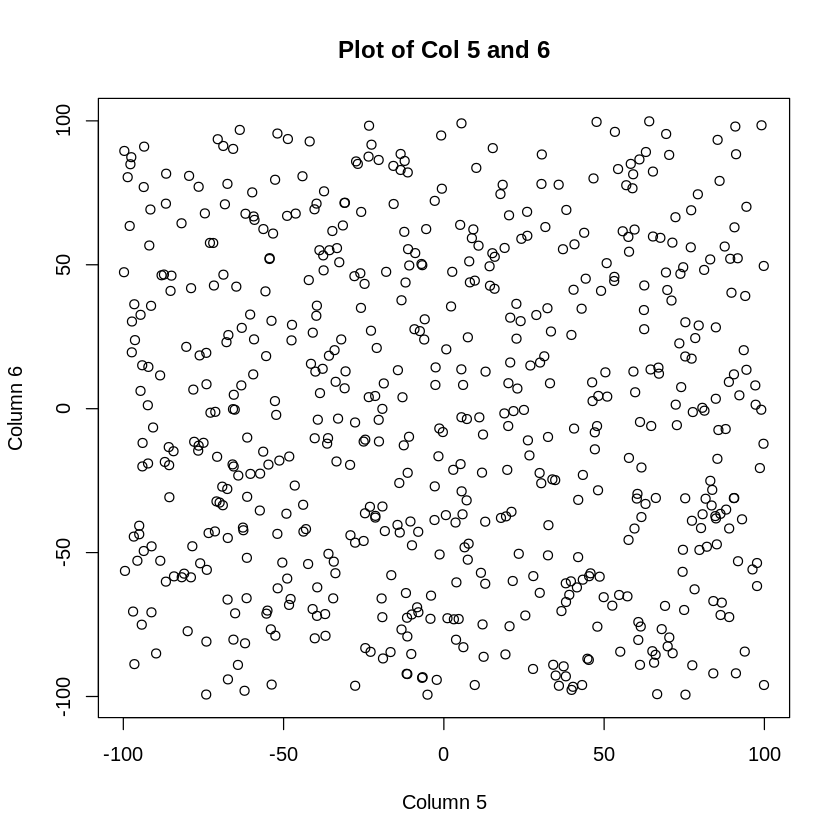

In [ ]:
plot(x=mat4[,5],y=mat4[,6], main = "Plot of Col 5 and 6", xlab = "Column 5", ylab="Column 6")

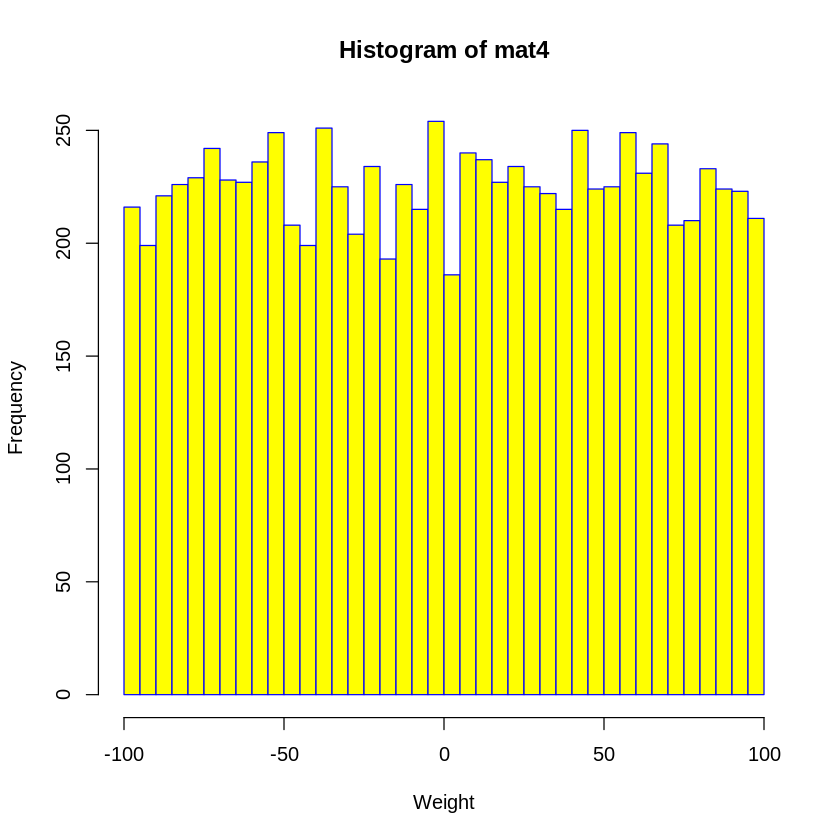

In [ ]:
# hist(v,main,xlab,xlim,ylim,breaks,col,border)
hist(mat4,xlab = "Weight",col = "yellow",border = "blue",breaks=50)

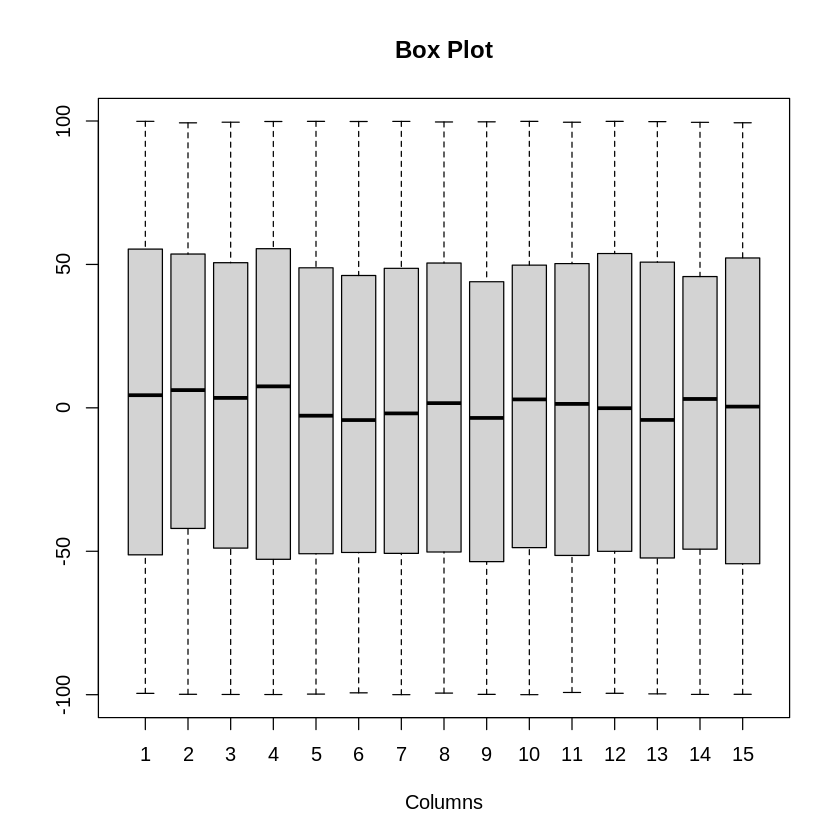

In [ ]:
#boxplot(x, data, notch, varwidth, names, main)
boxplot(x=mat4[,1:NCols],data = mat4, xlab = "Columns", main = "Box Plot")

Q5.Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].

Perform the following operations:

1.Perform t-Test on each column.

2.Perform Wilcoxon Signed Rank Test on each column.

3.Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [ ]:
NCols = 5
NRows = 500
mat5 <- matrix(runif(NCols*NRows,min=5,max=10),ncol=NCols)
head(mat5)

6.045141,5.542586,7.931495,5.871941,6.796485
5.638486,6.156009,9.421647,8.100970,8.249271
6.853887,7.686284,6.582852,8.641713,5.338375
9.122779,9.659686,7.230863,8.160342,7.083732
5.569546,8.297853,7.338555,8.234336,7.991805
7.869631,9.381690,6.070439,8.208311,9.715910


In [ ]:
for (i in 1:5)
  print(t.test(mat5[,i]))


	One Sample t-test

data:  mat5[, i]
t = 120.13, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.443004 7.690509
sample estimates:
mean of x 
 7.566756 


	One Sample t-test

data:  mat5[, i]
t = 115.88, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.372755 7.627083
sample estimates:
mean of x 
 7.499919 


	One Sample t-test

data:  mat5[, i]
t = 115.57, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.283405 7.535333
sample estimates:
mean of x 
 7.409369 


	One Sample t-test

data:  mat5[, i]
t = 114, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.364601 7.622891
sample estimates:
mean of x 
 7.493746 


	One Sample t-test

data:  mat5[, i]
t = 115.63, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is 

In [ ]:
for (i in 1:5)
  print(wilcox.test(mat5[,i]))


	Wilcoxon signed rank test with continuity correction

data:  mat5[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  mat5[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  mat5[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  mat5[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  mat5[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0



In [ ]:
t.test(mat5[,3],mat5[,4])


	Welch Two Sample t-test

data:  mat5[, 3] and mat5[, 4]
t = -0.91893, df = 997.38, p-value = 0.3584
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.26456099  0.09580775
sample estimates:
mean of x mean of y 
 7.409369  7.493746 


In [ ]:
wilcox.test(mat5[,3],mat5[,4])


	Wilcoxon rank sum test with continuity correction

data:  mat5[, 3] and mat5[, 4]
W = 120996, p-value = 0.3807
alternative hypothesis: true location shift is not equal to 0
